In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('IMDB Dataset_with_new_NLP_features.csv')

# Select features (assuming 'sentiment' is the target variable and others are features)
features = [
    'lexical_diversity', 'readability_score', 'avg_sentence_length', 'sentiment_score',
    'sentiment_subjectivity', 'negation_count', 'tfidf_top_keyword_sum', 'action_word_count',
    'feature_mentions', 'adjective_ratio', 'lda_topic_similarity', 'noun_verb_ratio',
    'cosine_similarity_to_template', 'syntactic_complexity', 'vader_sentiment', 'person_count',
    'organization_count', 'location_count', 'bigram_top_keyword_sum', 'lstm_features',
    'bert_embedding_mean', 'cosine_similarity_template', 'rnn_complexity_score'
]

X = data[features]
y = data['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

    negative       0.74      0.71      0.73        28
    positive       0.65      0.68      0.67        22

    accuracy                           0.70        50
   macro avg       0.70      0.70      0.70        50
weighted avg       0.70      0.70      0.70        50

Confusion Matrix:
 [[20  8]
 [ 7 15]]


/Users/michaelrivera/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


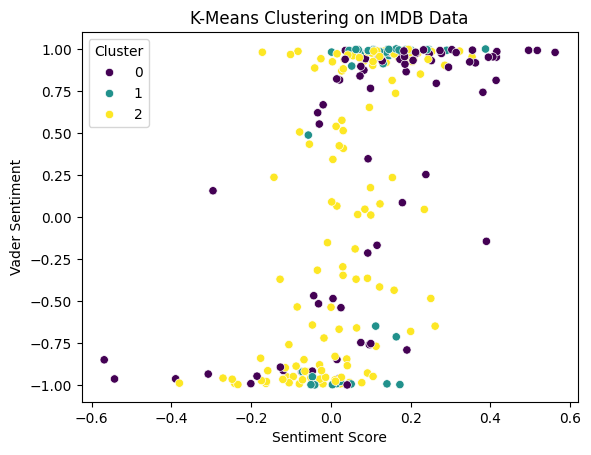

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('IMDB Dataset_with_new_NLP_features.csv')

# Select relevant features for clustering
features = [
    'lexical_diversity', 'readability_score', 'avg_sentence_length', 'sentiment_score',
    'sentiment_subjectivity', 'negation_count', 'tfidf_top_keyword_sum', 'action_word_count',
    'adjective_ratio', 'lda_topic_similarity', 'noun_verb_ratio', 'cosine_similarity_to_template',
    'syntactic_complexity', 'vader_sentiment', 'person_count', 'organization_count',
    'location_count', 'bigram_top_keyword_sum', 'lstm_features', 'bert_embedding_mean',
    'cosine_similarity_template', 'rnn_complexity_score'
]

# Prepare the data
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(X_scaled)

# Add the cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Visualize the clusters (using two example features)
sns.scatterplot(x=data['sentiment_score'], y=data['vader_sentiment'], hue=data['Cluster'], palette='viridis')
plt.title("K-Means Clustering on IMDB Data")
plt.xlabel("Sentiment Score")
plt.ylabel("Vader Sentiment")
plt.show()


/Users/michaelrivera/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


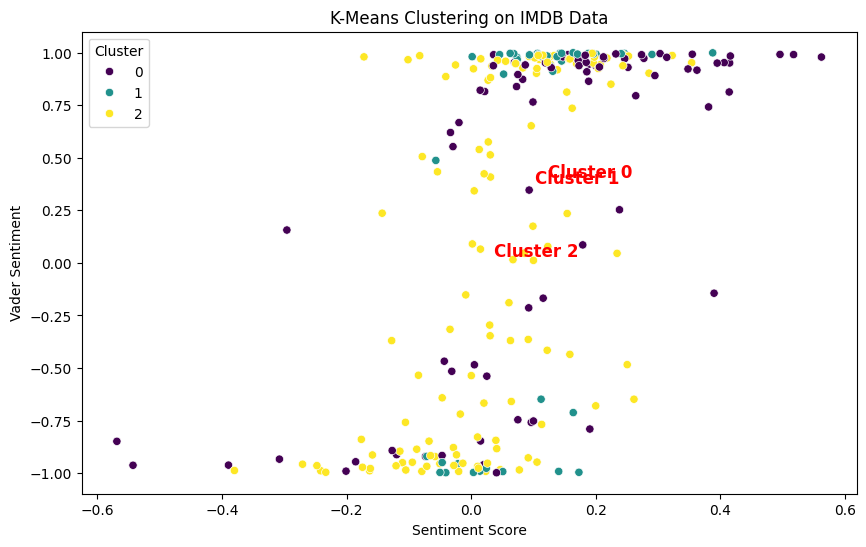

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('IMDB Dataset_with_new_NLP_features.csv')

# Select relevant features for clustering
features = [
    'lexical_diversity', 'readability_score', 'avg_sentence_length', 'sentiment_score',
    'sentiment_subjectivity', 'negation_count', 'tfidf_top_keyword_sum', 'action_word_count',
    'adjective_ratio', 'lda_topic_similarity', 'noun_verb_ratio', 'cosine_similarity_to_template',
    'syntactic_complexity', 'vader_sentiment', 'person_count', 'organization_count',
    'location_count', 'bigram_top_keyword_sum', 'lstm_features', 'bert_embedding_mean',
    'cosine_similarity_template', 'rnn_complexity_score'
]

# Prepare the data
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(X_scaled)

# Add the cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Calculate cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Visualize the clusters (using two example features)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['sentiment_score'], y=data['vader_sentiment'], hue=data['Cluster'], palette='viridis')

# Annotate cluster centers
for i, center in enumerate(cluster_centers):
    plt.text(center[3], center[13], f'Cluster {i}', fontsize=12, weight='bold', color='red')

plt.title("K-Means Clustering on IMDB Data")
plt.xlabel("Sentiment Score")
plt.ylabel("Vader Sentiment")
plt.legend(title="Cluster")
plt.show()


Cluster Summary:
         lexical_diversity                                          \
                     mean    median       std       min       max   
Cluster                                                             
0                0.754676  0.755245  0.067651  0.562500  0.914894   
1                0.609108  0.609638  0.054023  0.486877  0.730000   
2                0.707309  0.703557  0.058467  0.488235  0.888889   

        readability_score                                                 ...  \
                     mean      median        std         min         max  ...   
Cluster                                                                   ...   
0             -193.546614 -193.691048  28.185012 -264.770962 -126.008622  ...   
1             -233.289451 -227.393737  28.052784 -296.137500 -193.604081  ...   
2             -218.922202 -218.025029  34.483455 -351.838400 -149.828937  ...   

        cosine_similarity_template                                          \
  

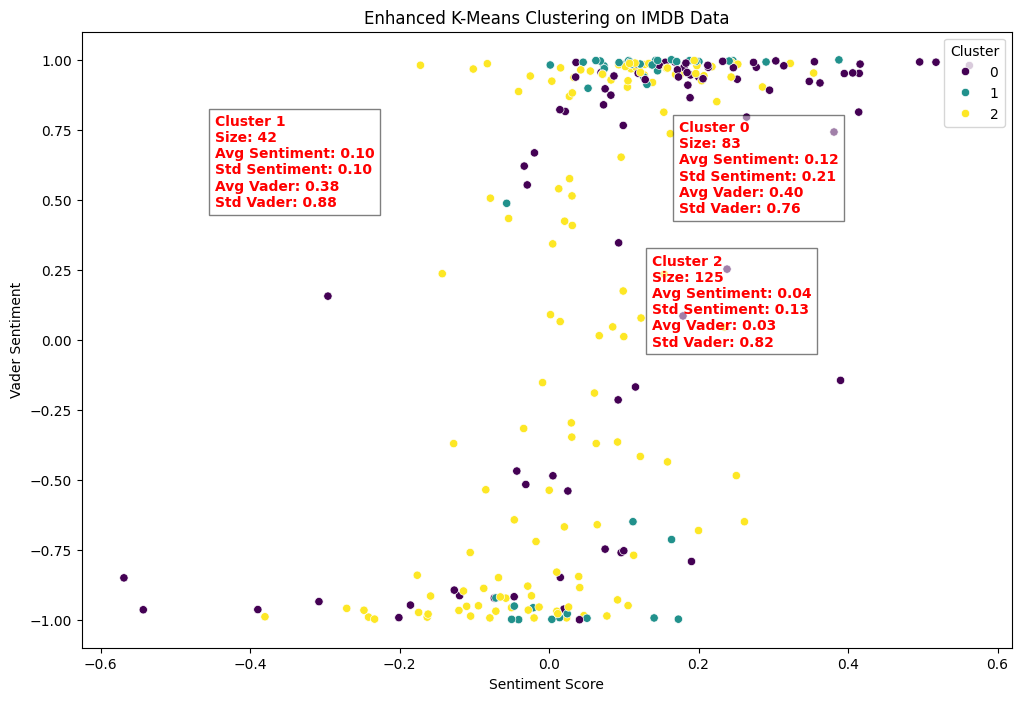

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = pd.read_csv('IMDB Dataset_with_new_NLP_features.csv')

# Select relevant features for clustering
features = [
    'lexical_diversity', 'readability_score', 'avg_sentence_length', 'sentiment_score',
    'sentiment_subjectivity', 'negation_count', 'tfidf_top_keyword_sum', 'action_word_count',
    'adjective_ratio', 'lda_topic_similarity', 'noun_verb_ratio', 'cosine_similarity_to_template',
    'syntactic_complexity', 'vader_sentiment', 'person_count', 'organization_count',
    'location_count', 'bigram_top_keyword_sum', 'lstm_features', 'bert_embedding_mean',
    'cosine_similarity_template', 'rnn_complexity_score'
]

# Prepare the data
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Calculate cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Summarize key characteristics of each cluster
numeric_cols = data.select_dtypes(include=[np.number]).columns
cluster_summary = data[numeric_cols].groupby('Cluster').agg(['mean', 'median', 'std', 'min', 'max'])
print("Cluster Summary:\n", cluster_summary)

# Determine top features for each cluster
for cluster_num in range(kmeans.n_clusters):
    cluster_data = data[data['Cluster'] == cluster_num]
    top_features = cluster_data[features].mean().sort_values(ascending=False).head(5)
    print(f"\nTop Features for Cluster {cluster_num}:\n", top_features)

# Enhance visualization with detailed annotations
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['sentiment_score'], y=data['vader_sentiment'], hue=data['Cluster'], palette='viridis')

# Annotate cluster centers and provide more descriptive labels
offsets = [(0.05, 0.05), (-0.55, 0.1), (0.1, -0.05)]  # Example offsets to shift the text positions
for i, center in enumerate(cluster_centers):
    cluster_size = len(data[data['Cluster'] == i])
    avg_sentiment = np.mean(data[data['Cluster'] == i]['sentiment_score'])
    avg_vader = np.mean(data[data['Cluster'] == i]['vader_sentiment'])
    std_sentiment = np.std(data[data['Cluster'] == i]['sentiment_score'])
    std_vader = np.std(data[data['Cluster'] == i]['vader_sentiment'])
    
    # Apply offset to position the text box away from overlapping
    x_offset, y_offset = offsets[i % len(offsets)]
    plt.text(center[3] + x_offset, center[13] + y_offset,
             f'Cluster {i}\nSize: {cluster_size}\nAvg Sentiment: {avg_sentiment:.2f}\n'
             f'Std Sentiment: {std_sentiment:.2f}\nAvg Vader: {avg_vader:.2f}\n'
             f'Std Vader: {std_vader:.2f}',
             fontsize=10, weight='bold', color='red', bbox=dict(facecolor='white', alpha=0.5))

plt.title("Enhanced K-Means Clustering on IMDB Data")
plt.xlabel("Sentiment Score")
plt.ylabel("Vader Sentiment")
plt.legend(title="Cluster", loc='upper right')
plt.show()


Performing clustering...
   Cluster                                     processed_text
0        2  one of the other reviewers has mentioned that ...
1        2  a wonderful little production. <br /><br />the...
2        2  i thought this was a wonderful way to spend ti...
3        2  basically there's a family where a little boy ...
4        2  petter mattei's "love in the time of money" is...

Topics for Cluster 2:
Topic 1: plot movies like film movie
Topic 2: bad just film movie br
Topic 3: story just film movie br

Topics for Cluster 0:
Topic 1: just work story movie film
Topic 2: like movies good br movie
Topic 3: watch film just like movie

Topics for Cluster 1:
Topic 1: story new like world film
Topic 2: hamlet just movie like film
Topic 3: life tom film war movie


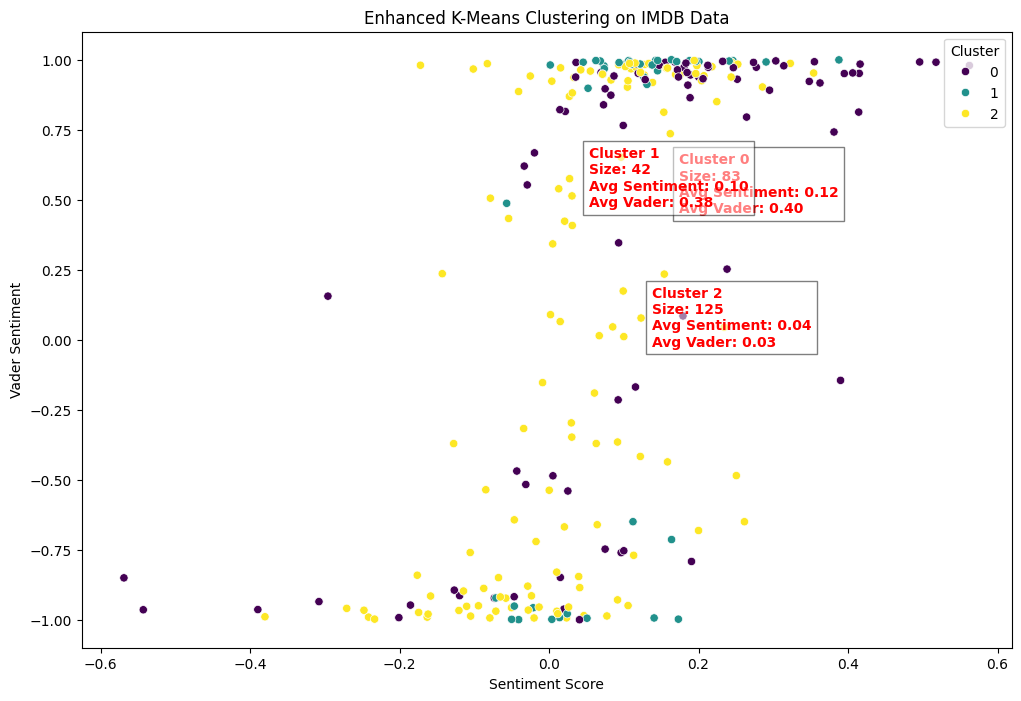

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming it has a 'text' column for the movie reviews)
data = pd.read_csv('IMDB Dataset_with_new_NLP_features.csv')

# Function to preprocess the text data
def preprocess_text(text):
    # Convert to lowercase, remove punctuation, and stop words can be handled here
    # For simplicity, let's assume text is already cleaned
    return text.lower()

# Apply preprocessing to the text column
data['processed_text'] = data['text'].apply(preprocess_text)

# Select relevant features for clustering
features = [
    'lexical_diversity', 'readability_score', 'avg_sentence_length', 'sentiment_score',
    'sentiment_subjectivity', 'negation_count', 'tfidf_top_keyword_sum', 'action_word_count',
    'adjective_ratio', 'lda_topic_similarity', 'noun_verb_ratio', 'cosine_similarity_to_template',
    'syntactic_complexity', 'vader_sentiment', 'person_count', 'organization_count',
    'location_count', 'bigram_top_keyword_sum', 'lstm_features', 'bert_embedding_mean',
    'cosine_similarity_template', 'rnn_complexity_score'
]

# Prepare the data for clustering
X = data[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering if not already done
if 'Cluster' not in data.columns:
    print("Performing clustering...")
    kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    data['Cluster'] = kmeans.labels_

# Verify if the 'Cluster' column is added
print(data[['Cluster', 'processed_text']].head())

# Define a function to extract topics from each cluster
def get_topics_per_cluster(cluster_data, num_topics=3, num_words=5):
    vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(cluster_data['processed_text'])
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(dtm)

    # Extract and print the top words per topic
    words = np.array(vectorizer.get_feature_names_out())
    for topic_idx, topic in enumerate(lda.components_):
        top_words = [words[i] for i in topic.argsort()[-num_words:]]
        print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")

# Group the data by clusters and extract topics for each
for cluster_num in data['Cluster'].unique():
    print(f"\nTopics for Cluster {cluster_num}:")
    cluster_data = data[data['Cluster'] == cluster_num]
    get_topics_per_cluster(cluster_data)

# Optional: Visualize Clusters Using Sentiment Scores
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['sentiment_score'], y=data['vader_sentiment'], hue=data['Cluster'], palette='viridis')

# Annotate cluster centers (optional)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
offsets = [(0.05, 0.05), (-0.05, 0.1), (0.1, -0.05)]  # Adjust to prevent overlapping text
for i, center in enumerate(cluster_centers):
    cluster_size = len(data[data['Cluster'] == i])
    avg_sentiment = np.mean(data[data['Cluster'] == i]['sentiment_score'])
    avg_vader = np.mean(data[data['Cluster'] == i]['vader_sentiment'])
    plt.text(center[3] + offsets[i % len(offsets)][0], center[13] + offsets[i % len(offsets)][1],
             f'Cluster {i}\nSize: {cluster_size}\nAvg Sentiment: {avg_sentiment:.2f}\n'
             f'Avg Vader: {avg_vader:.2f}', fontsize=10, weight='bold', color='red',
             bbox=dict(facecolor='white', alpha=0.5))

plt.title("Enhanced K-Means Clustering on IMDB Data")
plt.xlabel("Sentiment Score")
plt.ylabel("Vader Sentiment")
plt.legend(title="Cluster", loc='upper right')
plt.show()


# Cluster Topic Summaries

### **Cluster 2 Summary**
1. **Topic 1: General Movie Commentary**
   - **Top Words**: `plot`, `movies`, `like`, `film`, `movie`
   - **Summary**: This topic seems to focus on general discussions about movie plots. The frequent use of "plot," "movies," and "like" suggests that reviews in this cluster are centered around opinions on the storyline or narrative structure of films. This may include comparisons to other movies or general critiques.

2. **Topic 2: Negative Reviews**
   - **Top Words**: `bad`, `just`, `film`, `movie`, `br`
   - **Summary**: This topic appears to capture negative feedback. The word "bad" suggests criticism, and the repeated appearance of "just," "film," and "movie" may indicate that reviewers felt a lack of depth or originality. The term "br" could be a placeholder or artifact, possibly from HTML or formatting issues.

3. **Topic 3: Story-Focused Critique**
   - **Top Words**: `story`, `just`, `film`, `movie`, `br`
   - **Summary**: Similar to Topic 2, this topic focuses on the story elements of films, with "just" hinting at a lack of satisfaction or simplification in the reviews. It suggests that this cluster might include comments where the storyline was a central point of critique, possibly indicating straightforward or formulaic plots.

### **Cluster 0 Summary**
1. **Topic 1: Mixed Reviews or Neutral Commentary**
   - **Top Words**: `just`, `work`, `story`, `movie`, `film`
   - **Summary**: This topic seems to reflect mixed reviews where the term "work" might imply how well a movie functions overall (e.g., “the movie just works” or “it didn’t work”). There is likely a focus on how the story aligns with expectations, with "just" indicating a neutral or moderate tone.

2. **Topic 2: Positive Reactions to Good Movies**
   - **Top Words**: `like`, `movies`, `good`, `br`, `movie`
   - **Summary**: This topic appears to capture positive reactions, with "good" signaling appreciation. The repeated use of "like" could indicate comparisons or aspects that reviewers found likable. This may suggest that reviews in this cluster include positive assessments of movies.

3. **Topic 3: Enjoyable Viewing Experience**
   - **Top Words**: `watch`, `film`, `just`, `like`, `movie`
   - **Summary**: This topic seems to emphasize the viewing experience, with "watch" indicating that reviews may be focused on how enjoyable or engaging the films were. The use of "just" and "like" could reflect straightforward recommendations or opinions about movies being enjoyable and worth watching.

### **Cluster 1 Summary**
1. **Topic 1: Storytelling and New Concepts**
   - **Top Words**: `story`, `new`, `like`, `world`, `film`
   - **Summary**: This topic seems to focus on storytelling elements and new concepts. The word "new" suggests novelty or innovative ideas, and "world" might refer to world-building in the film. This indicates reviews discussing unique storylines or concepts that stood out.

2. **Topic 2: Analysis of Classic or Known Works**
   - **Top Words**: `hamlet`, `just`, `movie`, `like`, `film`
   - **Summary**: The appearance of "Hamlet" suggests that reviews in this topic may involve analysis or comparisons to classic literature or well-known works. This might indicate a cluster of reviews that discuss movies with references to or adaptations of classical stories or plays.

3. **Topic 3: Themes of Life, War, and Character**
   - **Top Words**: `life`, `tom`, `film`, `war`, `movie`
   - **Summary**: This topic appears to center around films with themes of life, war, and characters. "Tom" could refer to a specific character or actor frequently mentioned (e.g., Tom Hanks in war movies), and the combination of "war" and "life" suggests movies that explore profound themes, possibly in historical or biographical films.

### **Overall Interpretation**
- **Cluster 2**: Primarily captures **critiques** of movies, with a focus on storyline and a mix of negative and straightforward commentary.
- **Cluster 0**: Appears to represent a **more general mix** of reviews, ranging from positive to neutral. There is an emphasis on the **viewing experience** and general impressions.
- **Cluster 1**: Seems to include reviews that **analyze storytelling** and thematic elements, with references to **classical stories** and **life experiences**, suggesting a deeper engagement with the content.
